In [1]:
# Imports for Assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Homework Problem 1a
(a) Because of transaction costs and fees, the average investor should beat the market slightly less than 50% of the time. If we assume that the average investor beats the market 47% of the time, what fraction of investors must be skilled?

In [5]:
PBGivenS = 0.55
PBGivenU = 0.46

PB = 0.47

PS = (PB - PBGivenU) / (PBGivenS - PBGivenU)
print(f"Fraction of skilled investors: {PS:.4f}")
print(f"Fraction of unskilled investors: {1-PS:.4f}")

Fraction of skilled investors: 0.1111
Fraction of unskilled investors: 0.8889


Homework Problem 1b
(b) Given that an investor beat the market last year, use Bayes’ rule to determine the probability that she is skilled

In [6]:
PSGivenB = PBGivenS * PS / PB
print(f"Probability that an investor is skilled given that they beat the market is: {PSGivenB:.4f}")

Probability that an investor is skilled given that they beat the market is: 0.1300


Homework Problem 1c
(c) Use Bayes’ rule to determine the probability that an investor is skilled given that she beats the market in at least two of the last three years.

In [9]:
n = 3      
k = 1

PBTwoPlusGivenS = 1 - stats.binom.cdf(k, n, PBGivenS)
PBTwoPlusGivenU = 1 - stats.binom.cdf(k, n, PBGivenU)

PSGivenBTwoPlus = PBTwoPlusGivenS * PS / (PBTwoPlusGivenS * PS + PBTwoPlusGivenU * (1 - PS))
print(f"Probability that an investor is skilled given that they beat the market in at least 2 of the last 3 years is: {PSGivenBTwoPlus:.4f}")

Probability that an investor is skilled given that they beat the market in at least 2 of the last 3 years is: 0.1403


Homework Problem 1d
(d) Verify (c) using a simulation. Suppose there are 1,000,000 investors and determine the number of skilled and unskilled investors. Then simulate the number of times each investor beats the market over the last three years for each skill level. Use these results to find the ratio of skilled investors that beat the market at least twice to the total number of investors that beat the market at least twice.

In [10]:
investors = 1_000_000
SInvestors = int(investors * PS)
UInvestors = investors - SInvestors

print(f"Number of Skilled Investors: {SInvestors:,}")
print(f"Number of Unskilled Investors: {UInvestors:,}")

SimulatedSInvestor_B = stats.binom.rvs(n=3, p=PBGivenS, size=SInvestors, random_state=0)
SimulatedUInvestor_B = stats.binom.rvs(n=3, p=PBGivenU, size=UInvestors, random_state=0)

Verified_Result = sum(SimulatedSInvestor_B >= 2) / (sum(SimulatedSInvestor_B >= 2) + sum(SimulatedUInvestor_B >= 2))

print(f"Verified Result: {Verified_Result:.4f}")   

Number of Skilled Investors: 111,111
Number of Unskilled Investors: 888,889
Verified Result: 0.1403


Homework Problem 1e
(e) Using either Bayes’ rule or a simulation create a graph of the number of years examined to the probability of being skilled. Let the horizontal axis represent the number of years n. Then use plot in matplotlib.pyplot to graph the probabilities of being skilled given at least n−2, n−1, and n market beats in the last n years. Suppose 2 ≤ n ≤ 10. Add a legend to help distinguish your three plots.

In [11]:
def SkilledGivenBeats(years, nminus, PBGivenS=PBGivenS, PBGivenU=PBGivenU, PS=PS, P_U=1 - PS):
    conditionalProb = []
    nminus += 1
    for year in years:
        PBYearsGivenS = 1 - stats.binom.cdf(k=year - nminus, n=year, p=PBGivenS)
        PBYearsGivenU = 1 - stats.binom.cdf(k=year - nminus, n=year, p=PBGivenU)
        PSGivenBYears = PBYearsGivenS * PS / (PBYearsGivenS * PS + PBYearsGivenU * (1 - PS))

        conditionalProb.append(PSGivenBYears)

    return conditionalProb

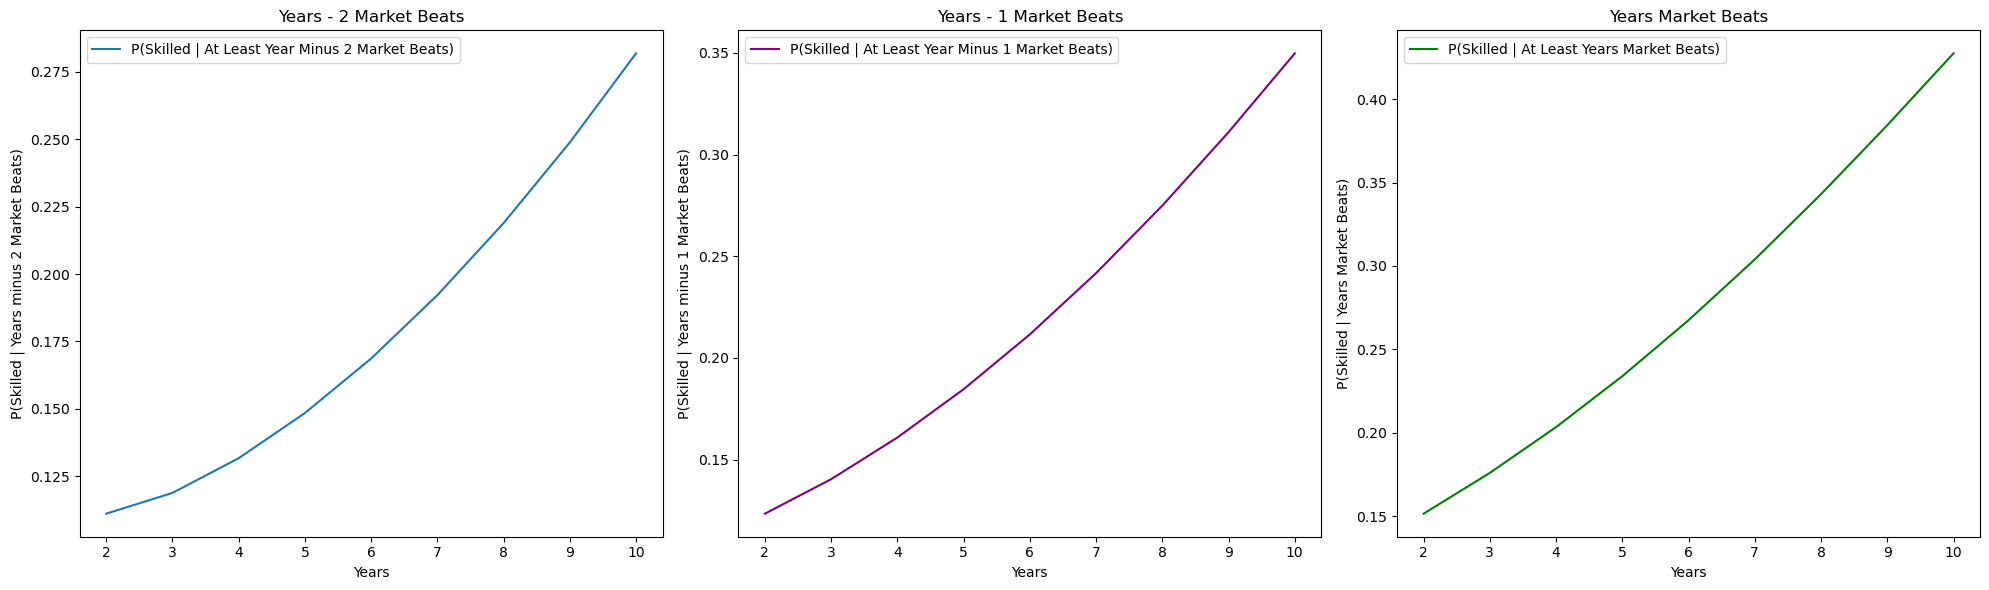

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

x_labels = np.arange(2, 11)

ax[0].set_title('Years - 2 Market Beats')
ax[1].set_title('Years - 1 Market Beats')
ax[2].set_title('Years Market Beats')
ax[0].set_xlabel('Years')
ax[1].set_xlabel('Years')
ax[2].set_xlabel('Years')
ax[0].set_ylabel('P(Skilled | Years minus 2 Market Beats)')
ax[1].set_ylabel('P(Skilled | Years minus 1 Market Beats)')
ax[2].set_ylabel('P(Skilled | Years Market Beats)')

y_labels1 = SkilledGivenBeats(x_labels, 2)
y_labels2 = SkilledGivenBeats(x_labels, 1)
y_labels3 = SkilledGivenBeats(x_labels, 0)


ax[0].plot(x_labels, y_labels1, label='P(Skilled | At Least Year Minus 2 Market Beats)')
ax[1].plot(x_labels, y_labels2, label='P(Skilled | At Least Year Minus 1 Market Beats)', color='purple')
ax[2].plot(x_labels, y_labels3, label='P(Skilled | At Least Years Market Beats)', color ='g')

ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[2].legend(loc=0)

plt.tight_layout()

Homework Problem 2a

In [31]:
mu_monthly    = 0.01      
sigma_monthly = 0.05      
K             = 12        
Nsim          = 200_000   
seed          = 42        


def analytical_mean_var(mu, sigma, k=12):
    """
    For Xi ~ N(mu, sigma^2), i.i.d., Y = sum_{i=1}^k Xi:
        E[Y]   = k * mu
        Var(Y) = k * sigma^2
    """
    EY = k * mu
    VarY = k * (sigma**2)
    return EY, VarY

def simulate_sum_normals(mu, sigma, k=12, npaths=100_000, seed=None):
    """
    Simulate Y = sum_{i=1}^k Xi where Xi ~ N(mu, sigma^2) i.i.d.
    Returns simulated vector of Y and its sample mean/variance.
    """
    rng = np.random.default_rng(seed)
    X = rng.normal(loc=mu, scale=sigma, size=(npaths, k))
    Y = X.sum(axis=1)
    sample_mean = Y.mean()
    sample_var  = Y.var(ddof=1)  
    return Y, sample_mean, sample_var

EY, VarY = analytical_mean_var(mu_monthly, sigma_monthly, K)

_, EY_hat, VarY_hat = simulate_sum_normals(
    mu_monthly, sigma_monthly, K, Nsim, seed
)

print("Analytical results:")
print(f"E[Y]   = {EY:.6f}")
print(f"Var(Y) = {VarY:.6f}")
print("\nSimulation check:")
print(f"E[Y] (sample)   = {EY_hat:.6f}")
print(f"Var(Y) (sample) = {VarY_hat:.6f}")

Analytical results:
E[Y]   = 0.120000
Var(Y) = 0.030000

Simulation check:
E[Y] (sample)   = 0.120302
Var(Y) (sample) = 0.029945


In [ ]:
Homework Problem 2b

In [14]:
# Given by Table in Problem
discreteReturnsR = np.array([-0.01, 0.06, 0.05])

# Calculate the monthly discrete return's mean and variance
discreteRetMean = np.mean(discreteReturnsR)
discreteRetVariance = np.var(discreteReturnsR, ddof=1)

# Algebra For mu_hat, sigmaSquared_hat Completed in Text Cell (REFER TO ABOVE CELL)
sigmaSquaredhat = np.log((discreteRetVariance / (discreteRetMean + 1) ** 2) + 1)
muhat = np.log(discreteRetMean + 1) - sigmaSquaredhat / 2

# Annualize via formula derived in 2a
sigmaSquared = sigmaSquaredhat * 12
mu = muhat * 12

print(f"Annualized Continuous Mean Return: {mu:.4f}")
print(f"Annualized Continuous Return Variance: {sigmaSquared:.4f}")

Annualized Continuous Mean Return: 0.3854
Annualized Continuous Return Variance: 0.0161


Homework Problem 2c
Calculate the annualized discrete return and annualized variance using your annualized estimates from part (b),

In [15]:
expectedDiscreteReturn = np.exp(mu + sigmaSquared / 2) - 1
expectedDiscreteVariance = (np.exp(sigmaSquared) - 1) * np.exp(2 * mu + sigmaSquared)

print(f"Expected Annual Discrete Return: {expectedDiscreteReturn:.4f}")
print(f"Expected Annual Discrete Return Variance: {expectedDiscreteVariance:.4f}")

Expected Annual Discrete Return: 0.4821
Expected Annual Discrete Return Variance: 0.0356


Homework Problem 3a
(a) Find estimates a and b for respective coefficients α and β using the data in the table. To simplify the calculations for a and b, use np.polyfit with the degree = 1; the output of this function is in the order b, a.

In [16]:
xi = np.arange(1, 11)
yi = np.array([-1.91, 0.02, 2.05, 4.11, 6.09, 8.45, 10.05, 11.99, 13.99, 16.02])

b, a = np.polyfit(xi, yi, deg=1)

print(f"Estimated Coefficient a: {a:.4f}")
print(f"Estimated Coefficient b: {b:.4f}")

Estimated Coefficient a: -3.8820
Estimated Coefficient b: 1.9942


Homework Problem 3b
(b) Calculate the residuals  ei=yi−(a+bxi) . Then use your residuals to calculate  se  using np.std.

Since you estimated two parameters, i.e.  α  and  β , set ddof = 2.

In [18]:
ei = yi - (a + b * xi)
stde = np.std(ei, ddof=2)

print(f"Estimated Residual Standard Deviation: {stde:.4f}")

Estimated Residual Standard Deviation: 0.1414


Homework Problem 3c
If we assume errors are normally distributed, we can approximate the distribution of  εi  using  N(0,s2e) . Set np.random.seed for reproducibility and repeat the following steps 100,000 times:

Generate  n=10  values of  ε~i  using norm in scipy and your result from (b).

Use (i) to calculate  y~i=a+bxi+ε~i .

Estimate  a~  and  b~  using np.polyfit and your  xi  and  y~ -values. Save your results.

Create two histograms to analyze the distributions of the  a~ - and  b~ -values that you generated.
Make sure you set density = True.

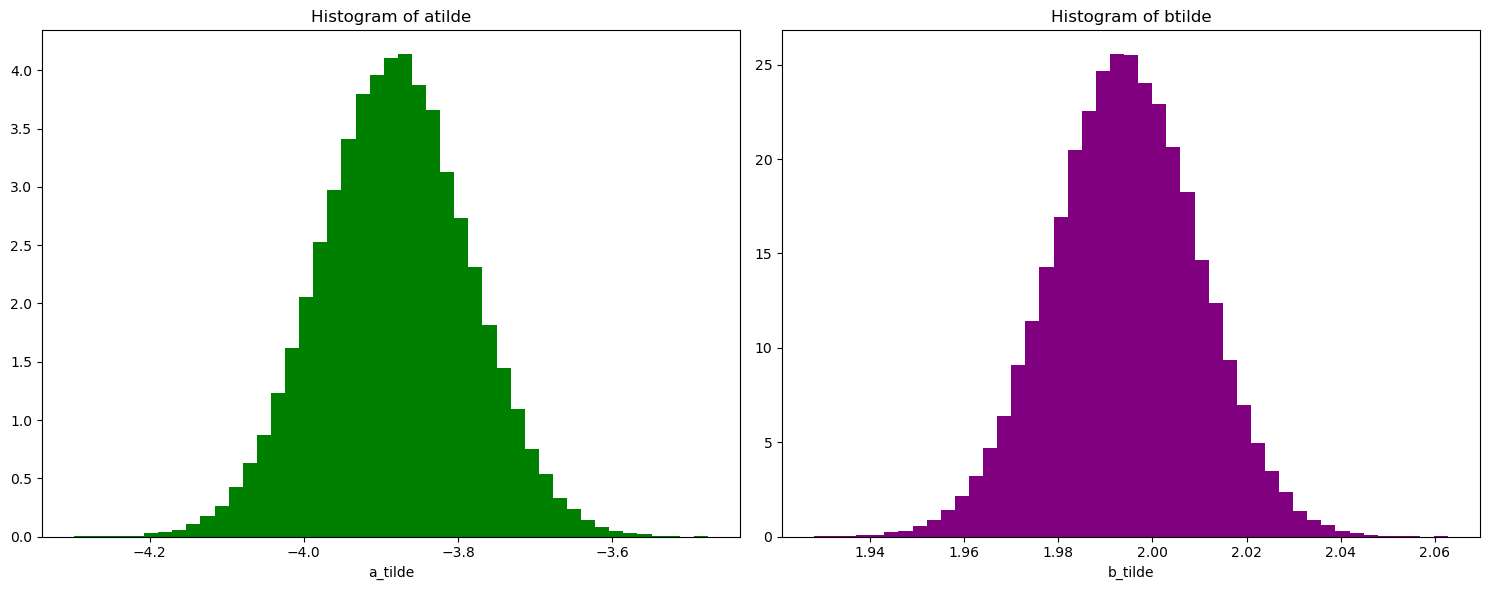

In [22]:
np.random.seed(7)

steps = 100_000

atildeStored = []
btildeStored = []

for step in range(steps):

    etilde = stats.norm.rvs(loc=0, scale=stde, size=10)

    ytilde = a + (b * xi) + etilde

    btilde, atilde = np.polyfit(xi, ytilde, deg=1)

    atildeStored.append(atilde)
    btildeStored.append(btilde)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title('Histogram of atilde')
ax[1].set_title('Histogram of btilde')

ax[0].hist(atildeStored, bins=45, density=True, color='g')
ax[1].hist(btildeStored, bins=45, density=True, color='purple')

ax[0].set_xlabel('a_tilde')
ax[1].set_xlabel('b_tilde')

plt.tight_layout()

Homework Problem 3d
Using your results in (c), calculate confidence intervals for  α  and  β  using the formulas

(2a−Q1−α/2(a~), 2a−Qα/2(a~))and(2b−Q1−α/2(b~), 2b−Qα/2(b~)), 

where  Qp(θ~)  denotes the  100×p%  quantile of the samples  θ~ .
The simpler formulas

(Qα/2(a~), Q1−α/2(a~))and(Qα/2(b~), Q1−α/2(b~)) 

will also work fine, but only because the normal distribution is symmetric.
You can use the function np.quantile to calculate the quantiles.
If you saved the  a~ - and  b~ -values in a pandas data frame, the method pd.DataFrame.quantile is another option.

In [25]:
alphaOverTwo = 0.10 / 2

lowerBoundaTilde = np.quantile(atildeStored, alphaOverTwo)
upperBoundaTilde = np.quantile(atildeStored, 1 - alphaOverTwo)

lowerBoundbTilde = np.quantile(btildeStored, alphaOverTwo)
upperBoundbTilde = np.quantile(btildeStored, 1 - alphaOverTwo)

print(f'Confidence Inteval - a_tilde: ({lowerBoundaTilde:.4f}, {upperBoundaTilde:.4f})')
print(f'Confidence Inteval - b_tilde: ({lowerBoundbTilde:.4f}, {upperBoundbTilde:.4f})')

Confidence Inteval - a_tilde: (-4.0407, -3.7229)
Confidence Inteval - b_tilde: (1.9686, 2.0198)


In [ ]:
Homework Problem 3e

In [27]:
# xi from 3a
n = len(xi)
xbar = np.mean(xi)

# std_e from 3b
stdErrora = stde * np.sqrt((1 / n) + (xbar ** 2 / np.sum((xi - xbar) ** 2)))
stdErrorb = stde / np.sqrt(np.sum((xi - xbar) ** 2))

# Calculate Confidence Intervals
alphat = 0.10
lowerBounda = a + stdErrora * stats.t.ppf(q=alphat/2, df=n-2)
upperBounda = a + stdErrora * stats.t.ppf(q=1-alphat/2, df=n-2)
lowerBoundb = b + stdErrorb * stats.t.ppf(q=alphat/2, df=n-2)
upperBoundb = b + stdErrorb * stats.t.ppf(q=1-alphat/2, df=n-2)

# Present Confidence Intervals
print(f'Confidence Inteval - a: ({lowerBounda:.4f}, {upperBounda:.4f})')
print(f'Confidence Inteval - b: ({lowerBoundb:.4f}, {upperBoundb:.4f})')

Confidence Inteval - a: (-4.0617, -3.7023)
Confidence Inteval - b: (1.9652, 2.0231)


Homework Problem 3f

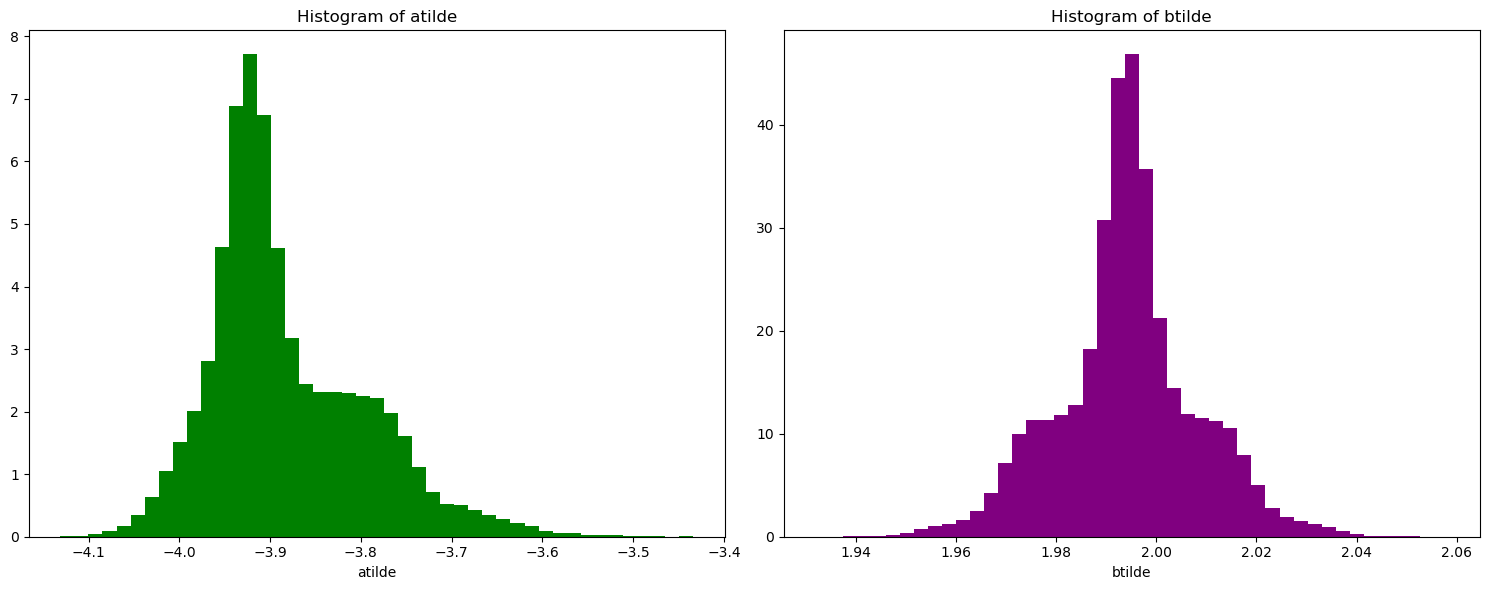

In [29]:
np.random.seed(7)

n = len(xi)

steps = 100_000

atildeStored = []
btildeStored = []

for step in range(steps):
 
    etilde = np.random.choice(a=ei , size=n, replace=True)

    ytilde = a + (b * xi) + etilde

    btilde, atilde = np.polyfit(xi, ytilde, deg=1)

    atildeStored.append(atilde)
    btildeStored.append(btilde)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title('Histogram of atilde')
ax[1].set_title('Histogram of btilde')

ax[0].hist(atildeStored, bins=45, density=True, color='g')
ax[1].hist(btildeStored, bins=45, density=True, color='purple')

ax[0].set_xlabel('atilde')
ax[1].set_xlabel('btilde')

plt.tight_layout()

Homework Problem 3g

In [30]:
alpha = 0.10

lowerBound_aTilde = 2 * a - np.quantile(atildeStored, q=1-alpha/2)
upperBound_aTilde = 2 * a - np.quantile(atildeStored, q=alpha/2)

lowerBound_bTilde = 2 * b - np.quantile(btildeStored, q=1-alpha/2)
upperBound_bTilde = 2 * b - np.quantile(btildeStored, q=alpha/2)

print(f'Confidence Inteval - a_tilde: ({lowerBoundaTilde:.4f}, {upperBoundaTilde:.4f})')
print(f'Confidence Inteval - b_tilde: ({lowerBoundbTilde:.4f}, {upperBoundbTilde:.4f})')

Confidence Inteval - a_tilde: (-4.0407, -3.7229)
Confidence Inteval - b_tilde: (1.9686, 2.0198)
